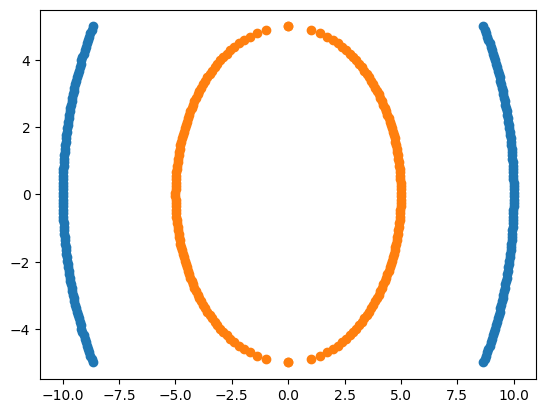

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])
plt.scatter(y,x)
plt.scatter(y1,x1)

In [2]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head(5)

<ipython-input-2-16f97d6df2cf>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [3]:
### Independent and Dependent features
X = df.iloc[:, :2]  
y = df.Y

In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [5]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [6]:
y_train

47     1
110    0
16     0
66     0
153    0
      ..
71     0
106    0
70     1
148    1
102    0
Name: Y, Length: 300, dtype: int64

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel="rbf")
classifier.fit(X_train,y_train)

SVC()

In [8]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [9]:
df.head()


,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [15]:
### using poly svm without kerneling
from sklearn.svm import SVC
classifier = SVC(kernel="poly")
classifier.fit(X_train,y_train)

SVC(kernel='poly')

In [16]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.69

In [17]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [18]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [21]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
47,4.993619,-0.252525,24.936231,0.063769,-1.261015
110,-9.169553,3.989899,84.080706,15.919294,-36.585591
16,9.410082,-3.383838,88.549638,11.450362,-31.842196
66,9.860133,1.666667,97.222222,2.777778,16.433555
153,-9.993749,-0.353535,99.875013,0.124987,3.533143
...,...,...,...,...,...
71,9.761334,2.171717,95.283645,4.716355,21.198857
106,-8.982945,4.393939,80.693297,19.306703,-39.470515
70,4.551063,2.070707,20.712172,4.287828,9.423918
148,-4.997704,0.151515,24.977043,0.022957,-0.757228


In [22]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0